## Unsupervised learning
Dimensional reduction is technique used to compress the size of data. It is generally used when the number of features are very high.


In [111]:
## importing python library 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio

In [112]:
##importing datasets
file_pth='./datasets/KMC_data1.mat'
dataset=scio.loadmat(file_pth)
print(dataset.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [113]:
X_trn=dataset['X']
print('Sample data points')
print(X_trn[:5,:])
m=X_trn.shape[0]
n=X_trn.shape[1]
print('Number of training examples m',m)
print('Number of features n',n)


Sample data points
[[3.38156267 3.38911268]
 [4.52787538 5.8541781 ]
 [2.65568187 4.41199472]
 [2.76523467 3.71541365]
 [2.84656011 4.17550645]]
Number of training examples m 50
Number of features n 2


Text(0.5, 1.0, 'Unlabeled data for visualization')

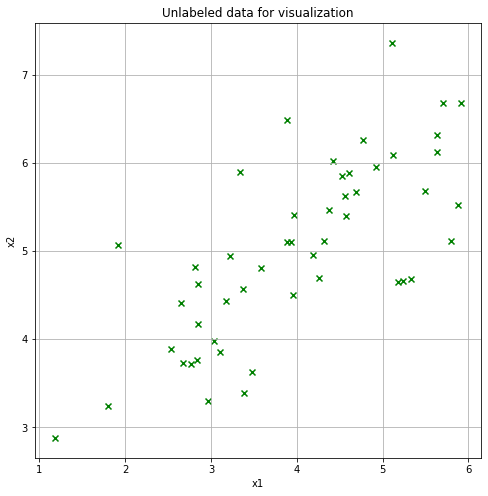

In [114]:
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(X_trn[:,0],X_trn[:,1],marker='x',color='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.title('Unlabeled data for visualization')

In [115]:
### the dataset consist of 2 features, i would be performing dimensional reduction using PCA
def Normalization(X):
    mu=np.mean(X,axis=0)
    sigma=np.std(X-mu,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm,mu,sigma
X_norm,mu,sigma=Normalization(X_trn)
print('Sample normalized data')
print(X_norm[:5,:])
print('Normalized data in such a way that mean of the data lies at 0 :',np.mean(X_norm,axis=0))

Sample normalized data
[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]
 [-1.05405373 -1.27071783]
 [-0.98402167 -0.81658417]]
Normalized data in such a way that mean of the data lies at 0 : [-1.17683641e-16  1.11022302e-15]


In [116]:
def PCA(X):
    m=X.shape[0]
    n=X.shape[1]
    corelation_matrix=np.cov(X.T,bias=True)/m
    u, s, v= np.linalg.svd(corelation_matrix)
    return u,s
u,s=PCA(X_norm)
print('The shape U obtained after performing PCA',u.shape)
print(u)

The shape U obtained after performing PCA (2, 2)
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [117]:
k=1
Ured=u[:,:k]
print(Ured.shape)
Z=np.dot(X_norm,Ured)


(2, 1)


In [118]:
print('Checking the accuarcy of the model')
K=np.sum(s[:k])/np.sum(s)
print('Dimenional reduction causes the data to have variance',K*100)

Checking the accuarcy of the model
Dimenional reduction causes the data to have variance 86.77651881696647


### Implementing PCA to compress images

In [119]:
#importing datasets
file_pth='./datasets/PCA_faces.mat'
dataset=scio.loadmat(file_pth)
print(dataset.keys())


dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [120]:
X_trn=dataset['X']
print('Sample data points')
print(X_trn[:5,:])
m=X_trn.shape[0]
n=X_trn.shape[1]
print('Number of training examples m',m)
print('Number of features n',n)

Sample data points
[[ -37.86631387  -45.86631387  -53.86631387 ... -110.86631387
  -111.86631387  -99.86631387]
 [   8.13368613   -0.86631387   -8.86631387 ...  -34.86631387
    -8.86631387    0.13368613]
 [ -32.86631387  -34.86631387  -36.86631387 ... -110.86631387
  -111.86631387 -111.86631387]
 [ -84.86631387  -64.86631387  -47.86631387 ...  -56.86631387
   -57.86631387  -53.86631387]
 [   2.13368613    6.13368613    5.13368613 ...   -9.86631387
     0.13368613  -14.86631387]]
Number of training examples m 5000
Number of features n 1024


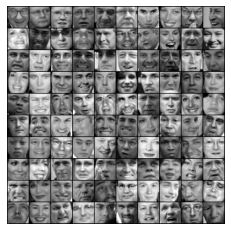

In [121]:
def display_data(x):
    (m, n) = x.shape

    # Set example_width automatically if not passed in
    example_width = np.round(np.sqrt(n)).astype(int)
    example_height = (n / example_width).astype(int)

    # Compute the number of items to display
    display_rows = np.floor(np.sqrt(m)).astype(int)
    display_cols = np.ceil(m / display_rows).astype(int)

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = - np.ones((pad + display_rows * (example_height + pad),
                              pad + display_rows * (example_height + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 0
    for j in range(display_rows):
        for i in range(display_cols):
            if curr_ex > m:
                break

            # Copy the patch
            # Get the max value of the patch
            max_val = np.max(np.abs(x[curr_ex]))
            display_array[pad + j * (example_height + pad) + np.arange(example_height),
                          pad + i * (example_width + pad) + np.arange(example_width)[:, np.newaxis]] = \
                          x[curr_ex].reshape((example_height, example_width)) / max_val
            curr_ex += 1

        if curr_ex > m:
            break

    # Display image
    plt.figure()
    plt.imshow(display_array, cmap='gray', extent=[-1, 1, -1, 1])
    plt.axis('off')
    
display_data(X_trn[0:100])

In [122]:
X_norm,mu,sigma=Normalization(X_trn)
print('Sample normalized data')
print(X_norm[:5,:])
print('Normalized data in such a way that mean of the data lies at 0 :',np.mean(X_norm,axis=0))
u,s=PCA(X_norm)
print('The shape U obtained after performing PCA',u.shape)
print(u[:5,:])

Sample normalized data
[[-0.31524019 -0.49758248 -0.69058357 ... -1.48595535 -1.43982921
  -1.18381859]
 [ 0.58400504  0.39602142  0.21916434 ... -0.08375909  0.41981342
   0.58578999]
 [-0.21749614 -0.27914597 -0.34690103 ... -1.48595535 -1.43982921
  -1.39617161]
 [-1.23403423 -0.8748819  -0.56928385 ... -0.489658   -0.46487094
  -0.36979864]
 [ 0.46671219  0.53502647  0.50219702 ...  0.37748968  0.58230647
   0.3203487 ]]
Normalized data in such a way that mean of the data lies at 0 : [ 7.81597009e-18  2.84217094e-18 -5.68434189e-18 ...  5.68434189e-18
  4.05009359e-17  3.55271368e-17]
The shape U obtained after performing PCA (1024, 1024)
[[-0.01425307 -0.03606596 -0.04561884 ...  0.00521903  0.00091143
   0.00077515]
 [-0.01474233 -0.03809858 -0.04756249 ... -0.01142763 -0.00228691
  -0.00434598]
 [-0.01501482 -0.03988747 -0.05082085 ...  0.01843345  0.00554132
   0.00873415]
 [-0.01530126 -0.0413843  -0.0532679  ... -0.01618279 -0.00730796
  -0.00635744]
 [-0.01551086 -0.04315243

In [123]:
k=10
Ured=u[:,:k]
print(Ured.shape)
Z=np.dot(X_norm,Ured)
print(Z.shape)
print('Checking the accuarcy of the model')
K=np.sum(s[:k])/np.sum(s)
print('Dimenional reduction causes the data to have variance',K*100)

(1024, 10)
(5000, 10)
Checking the accuarcy of the model
Dimenional reduction causes the data to have variance 67.27237361704466


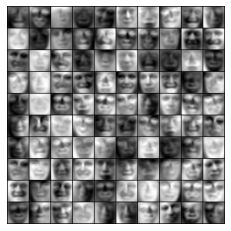

In [124]:
X_app=np.dot(Z,Ured.T)
display_data(X_app[0:100])

Checking the accuarcy of the model
Dimenional reduction causes the data to have variance 95.86646154919987


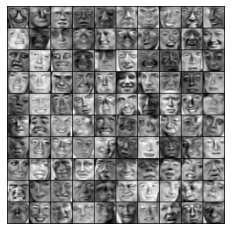

In [125]:
k=150
Ured=u[:,:k]
Z=np.dot(X_norm,Ured)
print('Checking the accuarcy of the model')
K=np.sum(s[:k])/np.sum(s)
print('Dimenional reduction causes the data to have variance',K*100)
X_app=np.dot(Z,Ured.T)
display_data(X_app[0:100])

In [126]:
## For k= 150 we achive 95% variance is reserved
print('size of original image',X_trn.shape)
print('Compressed image shape',Z.shape)

size of original image (5000, 1024)
Compressed image shape (5000, 150)


In [127]:
print('PCA helps in memory management and training of machine learning algorthims is much faster')

PCA helps in memory management and training of machine learning algorthims is much faster


### comparing image compression between K-mean and PCA

The size of the image (128, 128, 3)
Number of training examples m 16384
Numbet of features n 3


Text(0.5, 1.0, 'Compressed, with 25"" colors')

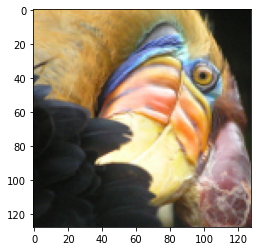

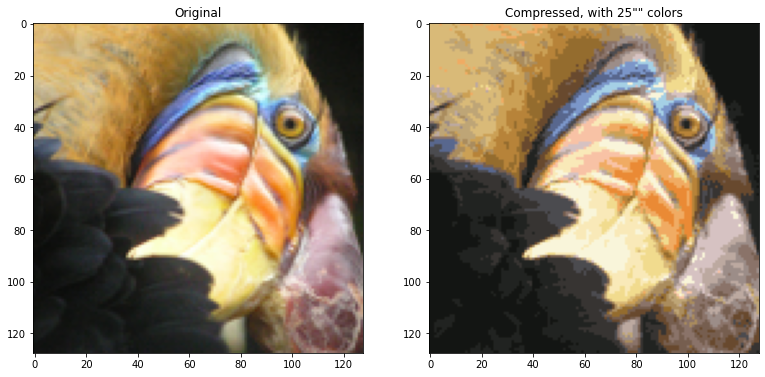

In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import linalg

file_pth='datasets/bird_small.png'
img = plt.imread(file_pth)
plt.imshow(img)
img_shape = img.shape
print('The size of the image',img_shape)

A = img/255
m0=A.shape[0]
n0=A.shape[1]
A = A.reshape(m0*n0,3)
m=A.shape[0]
n=A.shape[1]
print('Number of training examples m',m)
print('Numbet of features n',n)

K=25
k_mean = KMeans(K)
k_mean.fit(A)
Compressed_image = k_mean.cluster_centers_[k_mean.labels_].reshape(m0, n0, 3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(Compressed_image*255)
ax2.set_title('Compressed, with {}"" colors'.format(K))

The size of the image (2250, 4000, 3)
Number of training examples m 9000000
Numbet of features n 3
Sample normalized data
[[-0.07874369  0.04676749  0.10723135]
 [-0.10579479  0.01746922  0.07100186]
 [-0.07874369  0.04676749  0.10723135]
 [-0.03816703  0.09071488  0.16157559]
 [-0.09226924  0.03211835  0.08911661]]
Normalized data in such a way that mean of the data lies at 0 : [-1.38300557e-10 -1.72368761e-10 -1.17670772e-10]
The shape U obtained after performing PCA (3, 3)
[[-0.57637112  0.6334533   0.51626857]
 [-0.58190641  0.12541116 -0.80352783]
 [-0.5737432  -0.76355023  0.29632716]]
Checking the accuarcy of the model
Dimenional reduction causes the data to have variance 99.93572542381307


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Compressed using PCA 2')

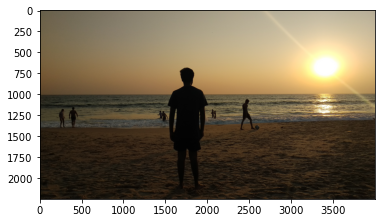

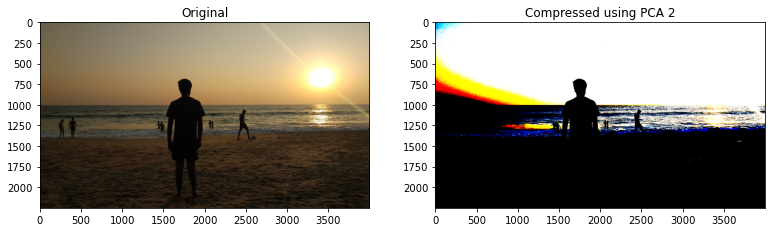

In [146]:

file_pth='datasets/my_image.jpg'
img = plt.imread(file_pth)
plt.imshow(img)
img_shape = img.shape
print('The size of the image',img_shape)

A = img/255
m0=A.shape[0]
n0=A.shape[1]
A = A.reshape(m0*n0,3)
m=A.shape[0]
n=A.shape[1]
print('Number of training examples m',m)
print('Numbet of features n',n)

X_norm,mu,sigma=Normalization(A)
print('Sample normalized data')
print(X_norm[:5,:])
print('Normalized data in such a way that mean of the data lies at 0 :',np.mean(X_norm,axis=0))
u,s=PCA(X_norm)
print('The shape U obtained after performing PCA',u.shape)
print(u[:5,:])
k=2
Ured=u[:,:k]
Z=np.dot(X_norm,Ured)
print('Checking the accuarcy of the model')
K=np.sum(s[:k])/np.sum(s)
print('Dimenional reduction causes the data to have variance',K*100)
X_app=np.dot(Z,Ured.T).reshape(m0,n0,3)


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(X_app*255)
ax2.set_title('Compressed using PCA {}'.format(k))